# Multiple Linear Regression with R regression plots in Python 

In [199]:
%matplotlib inline
import pandas as pd
import numpy as np
# Packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical packages
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

In [213]:
#Getting started
from sklearn import linear_model
df = pd.read_csv('CustomerData.csv',sep=',')

cols = df.columns
df.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,,102,44,Uniform,Uniform,335.05


In [214]:
df = df.replace(r'\s+', np.nan, regex=True)

In [215]:
print(df.shape)
### this is to find the NA
print(pd.isnull(df).any(1).nonzero()[0])

(3209, 14)
[0 1 2 3 4 5 6]


In [216]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True,col_fill=cols)

In [217]:
df.shape

(3202, 14)

In [389]:
#Visualization - Line plot to see the linear relationship between 'FrquncyOfPurchase' and 'TotalRevenueGenerated'.

#sns.set_context("notebook", font_scale=1.1)
#sns.set_style("ticks")
#sns.lmplot('FrquncyOfPurchase','TotalRevenueGenerated', data=df)
#plt.ylabel('TotalRevenueGenerated')
#plt.xlabel('FrquncyOfPurchase')

In [390]:
X = df.loc[:,'City':'NoOfGamesBought']
Y = df.loc[:,'TotalRevenueGenerated']

In [391]:
#Implementation

linear = linear_model.LinearRegression()
trainX = np.asarray(X[20:len(X)]).reshape(-1, 10) ## -1 in reshape is to determine the dimensions of an array. reshape accepts only one(row/columns) unknown number(-1) 
trainY = np.asarray(Y[20:len(Y)]).reshape(-1, 1)
testX = np.asarray(X[:20]).reshape(-1, 10)
testY = np.asarray(Y[:20]).reshape(-1, 1)
linear.fit(trainX, trainY)
linear.score(trainX, trainY)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print('R² Value: \n', linear.score(trainX, trainY))
predicted = linear.predict(testX)

('Coefficient: \n', array([[  1.16622179e+01,   2.03413706e+00,   1.00981977e+00,
         -1.24063575e-01,  -2.05078972e-02,   9.71399452e+00,
          9.73795372e+00,   2.81570175e-03,  -4.23203221e-02,
         -1.11248098e+01]]))
('Intercept: \n', array([ 16.9579547]))
('R\xc2\xb2 Value: \n', 0.7140095879110322)


In [392]:
### The coefficients
print('Coefficients: \n', linear.coef_)
### Intercepts
print('Intercept: \n', linear.intercept_)
### The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(testY, predicted))
### Explained variance score: 1 is perfect prediction
print('Variance score 1 : %.2f' % r2_score(testY, predicted))
print('Variance score 2 : %.2f' % linear.score(testX, testY))

### Plot outputs

('Coefficients: \n', array([[  1.16622179e+01,   2.03413706e+00,   1.00981977e+00,
         -1.24063575e-01,  -2.05078972e-02,   9.71399452e+00,
          9.73795372e+00,   2.81570175e-03,  -4.23203221e-02,
         -1.11248098e+01]]))
('Intercept: \n', array([ 16.9579547]))
Mean squared error: 1265.42
Variance score 1 : 0.56
Variance score 2 : 0.56


In [393]:
## Visualization
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [394]:
cols

Index([u'CustomerID', u'City', u'NoOfChildren', u'MinAgeOfChild',
       u'MaxAgeOfChild', u'Tenure', u'FrquncyOfPurchase',
       u'NoOfUnitsPurchased', u'FrequencyOFPlay', u'NoOfGamesPlayed',
       u'NoOfGamesBought', u'FavoriteChannelOfTransaction', u'FavoriteGame',
       u'TotalRevenueGenerated'],
      dtype='object')

In [327]:
#df.dropna(inplace=True)
#df.reset_index(drop=True, inplace=True,col_fill=cols)

In [395]:
model_f = 'TotalRevenueGenerated ~ CustomerID + \
                 City + \
                 NoOfChildren + \
                 MinAgeOfChild + \
                 MaxAgeOfChild + \
                 Tenure + \
                 FrquncyOfPurchase + \
                 NoOfUnitsPurchased + \
                 FrequencyOFPlay + \
                 NoOfGamesPlayed + \
                 NoOfGamesBought + \
                 FavoriteChannelOfTransaction + \
                 FavoriteGame'
model = smf.ols(formula=model_f, data=df)
model_fit = model.fit()

In [396]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
print(model_norm_residuals)
#print(abs(model_norm_residuals))
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
print(model_norm_residuals_abs_sqrt)
#print(model_norm_residuals_abs_sqrt)
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

[             nan  -4.63640747e-04              nan ...,   1.61924774e+00
  -1.59596721e+00  -2.19631651e+00]
[        nan  0.02153232         nan ...,  1.27249666  1.26331596
  1.48199747]


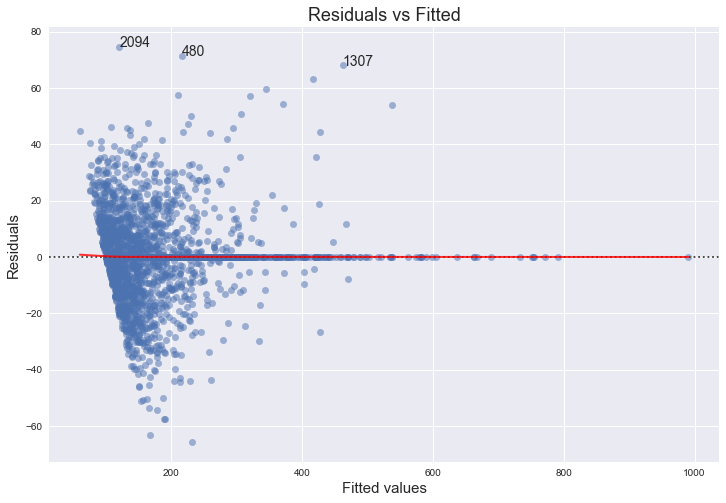

In [373]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'TotalRevenueGenerated', data=df, 
                          lowess=True,
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')
# annotations
#print(model_abs_resid)
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

             0
1794  4.279508
655   3.682932
480   3.589545
[ 3.42078157  3.22748653  3.10962598 ..., -3.10962598 -3.22748653
 -3.42078157]


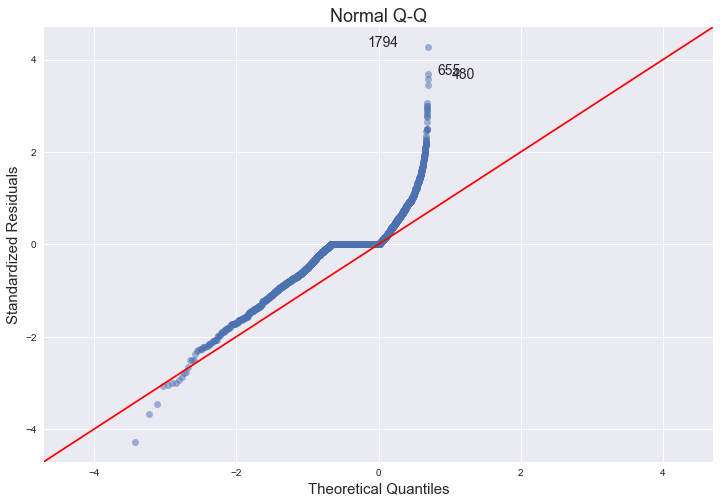

In [375]:
## Not able to annote appropirately.. Logic need to be revisited related to plot and also 

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = plt.figure(2)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations

abs_norm_resid = pd.DataFrame(model_norm_residuals,index=None)
#print(abs_norm_resid)
abs_norm_resid = abs_norm_resid.sort_values(0,ascending=False)
#print(abs_norm_resid)
#abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
print(abs_norm_resid_top_3)
print(np.flip(QQ.theoretical_quantiles, 0))
#for r, i in enumerate(abs_norm_resid_top_3):
#    print(r,i)
#    plot_lm_2.axes[0].annotate(i, 
#                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
#                                   model_norm_residuals[i]));
for i in abs_norm_resid_top_3.index:
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[i], 
                                   model_norm_residuals[i]));

[   0 1581 1540 ..., 1456  370  144]
[1581 1540 2660]


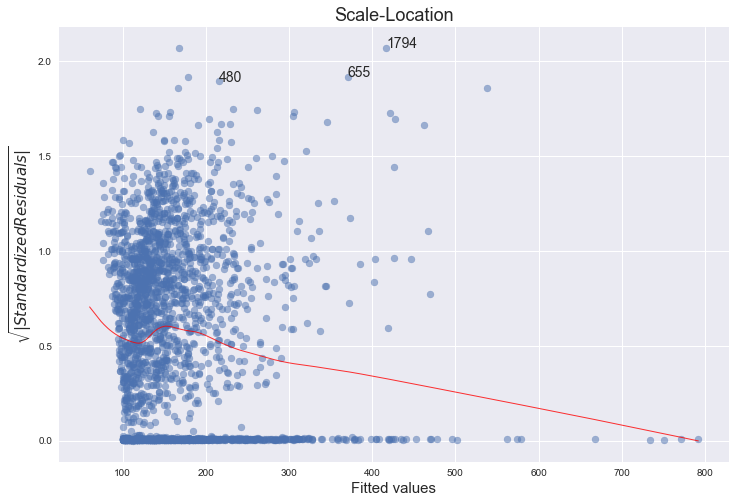

In [376]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)

#abs_sq_norm_resid = model_norm_residuals_abs_sqrt.sort_values(ascending=False)
print(abs_sq_norm_resid)

abs_sq_norm_resid_top_3 = abs_sq_norm_resid[1:4]
print(abs_sq_norm_resid_top_3)
for i in abs_norm_resid_top_3.index:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

(array([ 1.        ,  1.        ,  1.        , ...,  0.83646672,
        0.85999319,  0.84210706]), array([             nan,  -4.63640747e-04,              nan, ...,
         1.61924774e+00,  -1.59596721e+00,  -2.19631651e+00]))


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


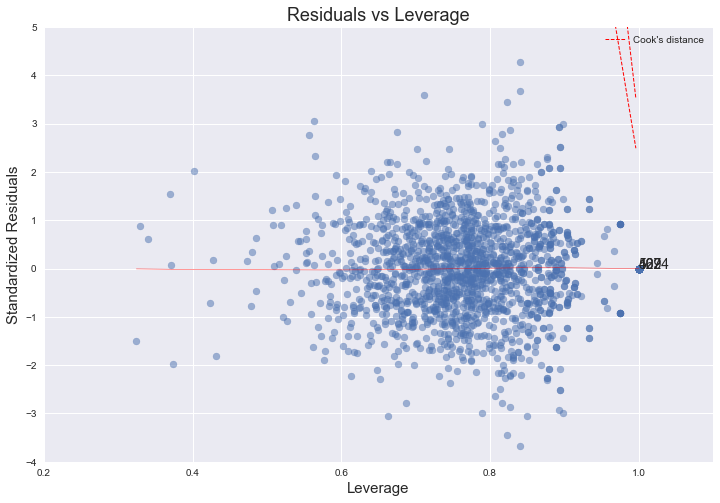

In [387]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)
print(model_leverage,model_norm_residuals)
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'Red', 'lw': 0.5, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0.2, 1.1,0.1)
plot_lm_4.axes[0].set_ylim(-4, 5,0.5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
# annotations
#leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
leverage = pd.DataFrame(model_cooks,index=None).sort_values(0,ascending=False)

leverage_top_3  = leverage_top_3[:3]
for i in leverage_top_3.index:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')
p = len(model_fit.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(.2, 8.000, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(.2, 8.000, 50)) # 1 line
plt.legend(loc='upper right');

## Simple Linear Regression

Automatically created module for IPython interactive environment
('Coefficients: \n', array([ 938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47


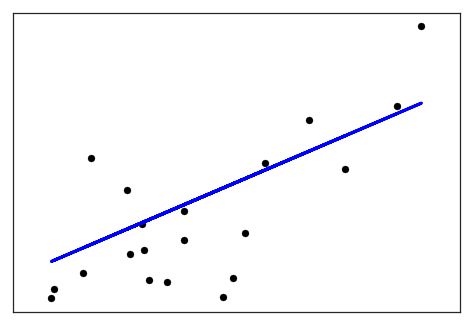

In [94]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()